In [19]:
import os
from matplotlib import pylab as plt
from os import path
from numpy import array, maximum, minimum, median
import numpy
import math

In [20]:
%matplotlib inline
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
#plt.rc('figure', facecolor='w')
plt.rc('legend', facecolor='k')
plt.rc('figure', figsize=(20,5))

In [21]:
N = 20
seeds = [i+1 for i in range(3)]
success = list(list() for seed in seeds)
success1 = list(list() for seed in seeds)
success2 = list(list() for seed in seeds)
success3 = list(list() for seed in seeds)
performance_path2 = './v6'
name2 = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-pad=3-novaluestep{step}.model.log'
performance_path1 = './v7'
name1 = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-pad=2-novaluestep{step}.model.log'
performance_path = './v3'
name = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-novaluestep{step}.model.log'
performance_path3 = './v11'
name3 = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-pad=1-novaluestep{step}.model.log'
steps = [(i + 1) * 5000 for i in range(N)]

for seed in seeds:
    for step in steps:
        file_name = path.join(performance_path, name.format(seed=seed, step=step))
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success[seed - 1].append(float(f.readlines()[-1].split()[-1]))
        else:
            success[seed - 1].append(None)

for seed in seeds:
    for step in steps:
        file_name = path.join(performance_path1, name1.format(seed=seed, step=step))
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success1[seed - 1].append(float(f.readlines()[-1].split()[-1]))
        else:
            success1[seed - 1].append(None)

for seed in seeds:
    for step in steps:
        file_name = path.join(performance_path2, name2.format(seed=seed, step=step))
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success2[seed - 1].append(float(f.readlines()[-1].split()[-1]))
        else:
            success2[seed - 1].append(None)

for seed in seeds:
    for step in steps:
        file_name = path.join(performance_path3, name3.format(seed=seed, step=step))
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success3[seed - 1].append(float(f.readlines()[-1].split()[-1]))
        else:
            success3[seed - 1].append(None)

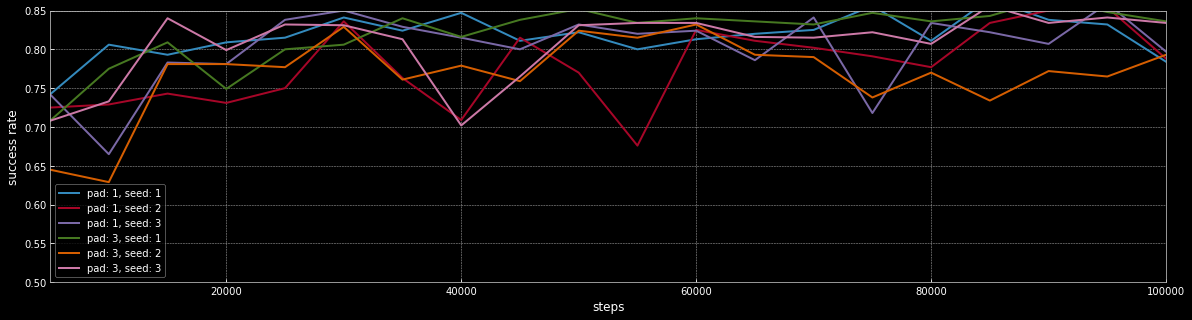

In [22]:
if success[0][0] is None:
    for seed in seeds:
        plt.plot(steps[1::2], success[seed - 1][1::2], label=f'seed: {seed}')
else:
    for seed in seeds:
        plt.plot(steps, success[seed - 1], label=f'pad: 1, seed: {seed}')

# if success1[0][0] is None:
#     for seed in seeds:
#         plt.plot(steps[1::2], success1[seed - 1][1::2], label=f'seed: {seed}')
# else:
#     for seed in seeds:
#         plt.plot(steps, success1[seed - 1], label=f'pad: 2, seed: {seed}')

# if success2[0][0] is None:
#     for seed in seeds:
#         plt.plot(steps[1::2], success2[seed - 1][1::2], label=f'pad: 3, seed: {seed}')
# else:
#     for seed in seeds:
#        plt.plot(steps, success2[seed - 1], label=f'pad: 3, seed: {seed}')

if success3[0][0] is None:
    for seed in seeds:
        plt.plot(steps[1::2], success3[seed - 1][1::2], label=f'pad: 3, seed: {seed}')
else:
    for seed in seeds:
       plt.plot(steps, success3[seed - 1], label=f'pad: 3, seed: {seed}')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('success rate')
plt.legend()
plt.ylim([0.40, 0.80])
plt.ylim([0.50, 0.85])
plt.xlim([5_000, 100_000])
plt.savefig('Color_success_rate.png', bbox_inches = 'tight')

In [23]:
N = 20
seeds = [i+1 for i in range(3)]
success = list(list() for i in range(17))
performance_path = ['l%d' % (i+1) for i in range(17)]
name = ['MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=%s-lambdao=%s-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed'% (j,i) + '=1' + \
       '-pad=1-novaluestep{step}.model.log' for j in ['0.25','0.75','1.0','1.5'] for i in ['0.25','0.75','1.0','1.5']]
name.append('MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed=1-novaluestep{step}.model.log')
steps = [(i + 1) * 5000 for i in range(N)]
for i in range(17):
    for step in steps:
        file_name = path.join(performance_path[i], name[i].format(step=step))
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success[i].append(float(f.readlines()[-1].split()[-1]))
        else:
            success[i].append(None)

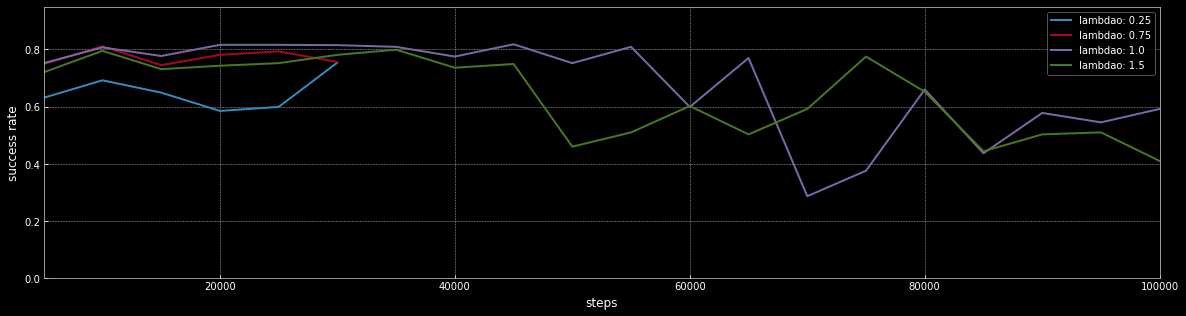

In [24]:
lam={0:0.25,1:0.75,2:1.0,3:1.5}
for i in [j for j in range(3,16,4)]:
        plt.plot(steps, success[i], label=f'lambdao: {lam[i//4]}')


plt.grid(True)
plt.xlabel('steps')
plt.ylabel('success rate')
plt.legend()
plt.ylim([0.00, 0.95])
plt.xlim([5_000, 100_000])
plt.savefig('Color_success_rate.png', bbox_inches = 'tight')

In [25]:
N = 20
n = dict();  d = 'dtr'; p='pad'; performance_path=dict()
n[d] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-novaluestep{step}.model.log'
# n[p] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
#        '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
#        '-pad=2-novaluestep{step}.model.log'
performance_path[d] = 'v3/'
#performance_path[p] = 'v7/'

name = n
steps = [(i + 1) * 5000 for i in range(N)]

seeds = dict(
    dtr=[i + 1 for i in range(3)],
    #pad=[i + 1 for i in range(3)],
)
success = {k: list(list() for seed in seeds[k]) for k in seeds}

for k in seeds:
    for seed in seeds[k]:
        for step in steps:
            file_name = path.join(performance_path[k], name[k].format(seed=seed, step=step))
            with open(file_name) as f:
                success[k][seed - 1].append(float(f.readlines()[-1].split()[-1]))

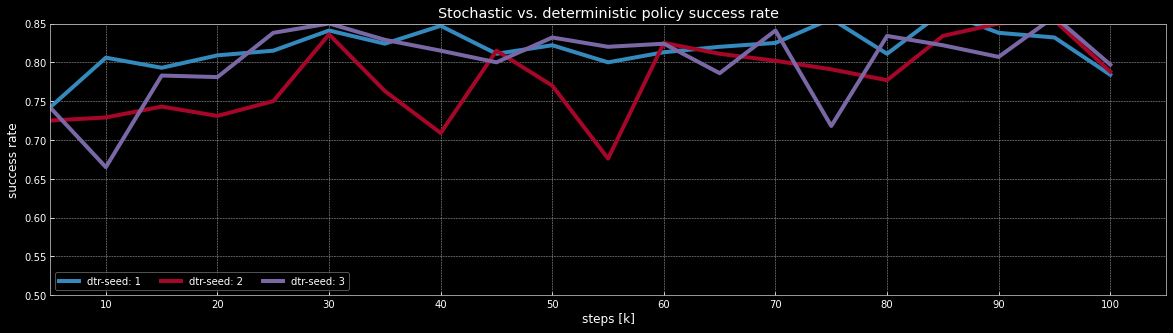

In [26]:
for k in seeds:
    for seed in seeds[k]:
        plt.plot(
            array(steps) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            alpha=.4 if k is 'stc' else 1,
            linewidth=4 if k is 'dtr' else 1
        )
plt.grid(True)
plt.xlabel('steps [k]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.85])
plt.xlim([5, 105])
plt.title('Stochastic vs. deterministic policy success rate')
plt.xticks(range(10, 100 + 10, 10));

# plt.savefig('Stc-vs-dtr-success_rate.png', bbox_inches = 'tight')

In [27]:
performance_path = 'v{version}/'
n = dict(); c = 'color';r = 'rgr'; h = 'hrd'; m= 'pad1'; l='log'; al='alllog'; p2='pad0'  # regressed / hardwired
v = {c: 2, r: 0, h: 1, m : 3 , l:11, al:5, p2:9}
N = {c: 20, r: 20, h: 20, m : 20 , l:20, al:20, p2:20}
# n[h] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=False-seed={seed}-novaluestep{step}.model.log'
# n[r] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}-novaluestep{step}.model.log'
n[m] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-novaluestep{step}.model.log'
n[p2] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}-pad=0' + \
       '-novaluestep{step}.model.log'
n[l] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed={seed}' + \
       '-pad=1-novaluestep{step}.model.log'
names = n
steps = {k: [(i + 1) * 5000 for i in range(0,N[k])] for k in names}

#seeds = [i + 1 for i in range(1)]
seeds = [1,2,3]
success = {k: list(list() for seed in seeds) for k in names}
for k in names:
    mean_success=0
    count=0
    highest_success=-1
    for seed in seeds:
        for step in steps[k]:
            file_name = path.join(performance_path.format(version=v[k]), names[k].format(seed=seed, step=step))
            with open(file_name) as f:
                success_rate=float(f.readlines()[-1].split()[-1])
                success[k][seed - 1].append(success_rate)
                mean_success+=float(success_rate)
                count+=1
                highest_success=max(highest_success,success_rate)
    print(k+":mean="+str(mean_success/count)+" high="+str(highest_success))

pad1:mean=0.7996000000000001 high=0.865
pad0:mean=0.79565 high=0.865
log:mean=0.7987333333333339 high=0.865


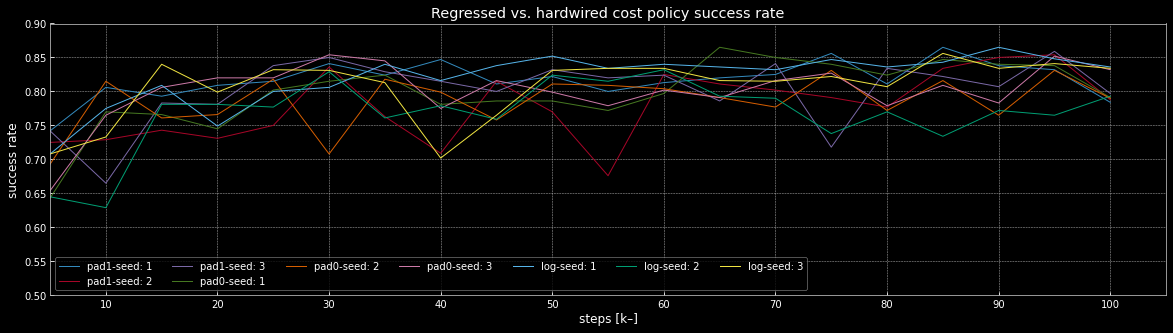

In [28]:
for k in names:
    for seed in seeds:
        plt.plot(
            array(steps[k]) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            linewidth=4 if k is h else 1
        )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 105])
plt.title('Regressed vs. hardwired cost policy success rate')
plt.xticks(range(10, 100 + 10, 10));

plt.savefig('Rgr-vs-hrd-success_rate.png', bbox_inches = 'tight')

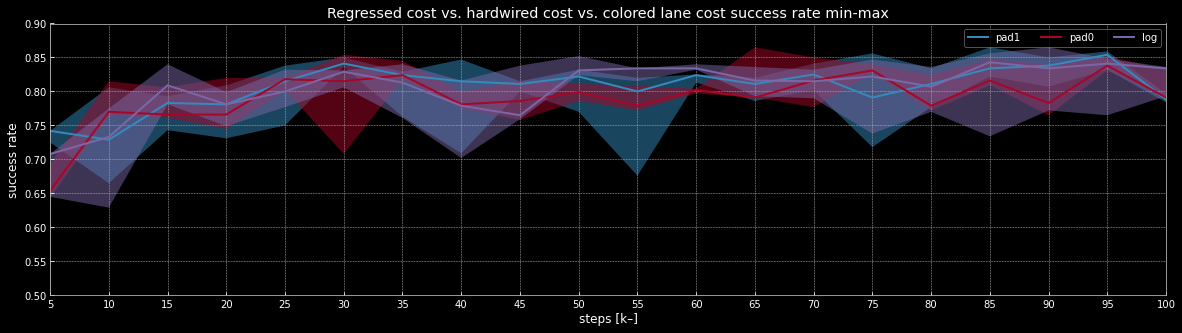

In [29]:
success_arr = {k: array(success[k]) for k in names}
# stats = ('min', 'max', 'median')
for k in names:
    plt.plot(
        array(steps[k]) / 1e3, numpy.median(success_arr[k], 0),
        label=f'{k}',
        linewidth=2,
    )
for k in names:
    plt.fill_between(
        array(steps[k]) / 1e3, success_arr[k].min(0), success_arr[k].max(0),
        alpha=.5,
    )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 100])
plt.title('Regressed cost vs. hardwired cost vs. colored lane cost success rate min-max')
plt.xticks(range(5, 100+5, 5));

plt.savefig('Rgr-vs-hrd-vs-color-success_rate-min-max.png', bbox_inches = 'tight')

In [30]:
N = 20
performance_path = ['rl%d' % (i+1) for i in range(13)]
name = ['MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=%s-lambdao=%s-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed'% (j,i) + '={seed}' + \
       '-pad=1-novaluestep{step}.model.log' for j in ['0.25','0.5','0.75'] for i in ['0.25','0.5','0.75']]
name += ['MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=%s-lambdao=%s-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed'% (j,i) + '={seed}' + \
       '-pad=1-novaluestep{step}.model.log' for j in ['1.0','1.5'] for i in ['0.5','0.75']]
#seeds = [i + 1 for i in range(1)]
seeds = [1,2,3]
success = [list(list() for seed in seeds) for k in performance_path]
steps = [(i + 1) * 5000 for i in range(N)]
for k in range(len(performance_path)):
    mean=0
    count=0
    highest_success=-1
    for seed in seeds:
        for step in steps:
            file_name = path.join(performance_path[k], name[k].format(seed=seed, step=step))
            with open(file_name) as f:
                success_rate=float(f.readlines()[-1].split()[-1])
                success[k][seed - 1].append(success_rate)
                if step>=60000:
                    mean+=float(success_rate)
                    count+=1
                    highest_success=max(highest_success,success_rate)

    #print(str(k)+":mean="+str(mean_success/count)+" high="+str(highest_success))
    mean=mean/count
    sum = 0
    for seed in seeds:
        step=5000
        for success_rate in success[k][seed - 1]:
            if step>=60000:
                sum+=(success_rate-mean)**2
            step+=5000
    sum=sum/count
    std = math.sqrt(sum)
    print(f"{k}:mean={mean:.2f}±{std:.2f}")
    #print(str(k)+":std="+str(std))

0:mean=0.76±0.04
1:mean=0.76±0.03
2:mean=0.76±0.04
3:mean=0.81±0.05
4:mean=0.81±0.03
5:mean=0.80±0.04
6:mean=0.82±0.03
7:mean=0.81±0.03
8:mean=0.81±0.04
9:mean=0.80±0.03
10:mean=0.79±0.05
11:mean=0.78±0.03
12:mean=0.78±0.02


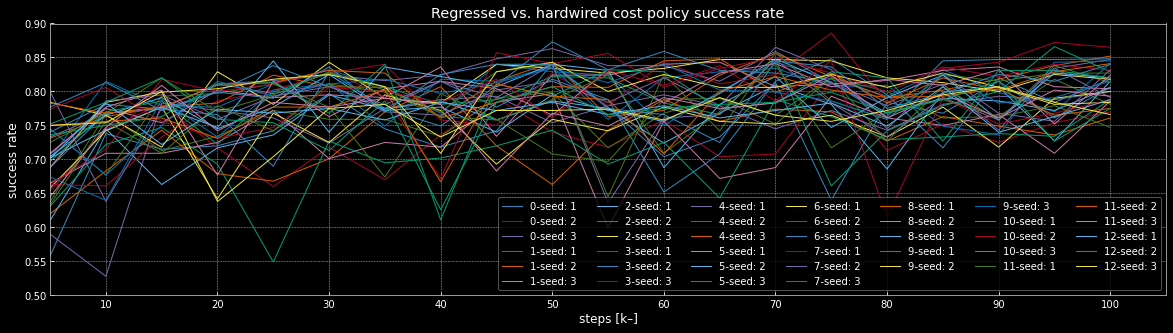

In [31]:
for k in range(len(performance_path)):
    for seed in seeds:
        plt.plot(
            array(steps) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            linewidth=4 if k is h else 1
        )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 105])
plt.title('Regressed vs. hardwired cost policy success rate')
plt.xticks(range(10, 100 + 10, 10));

plt.savefig('Rgr-vs-hrd-success_rate.png', bbox_inches = 'tight')

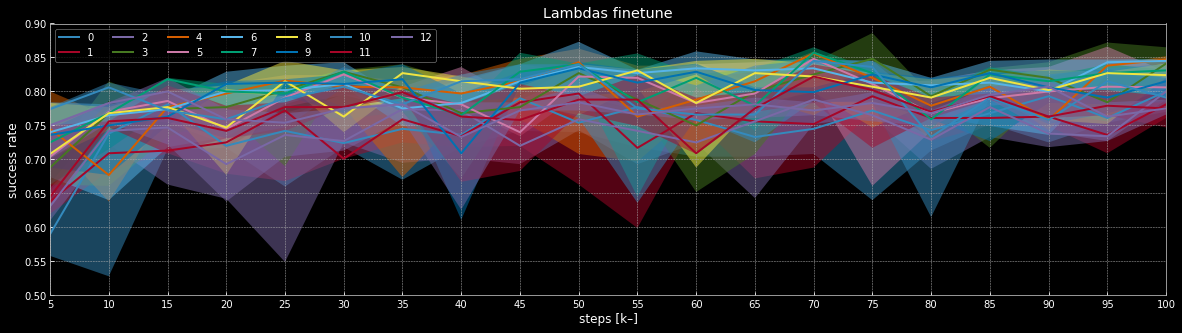

In [32]:
success_arr = {k: array(success[k]) for k in range(len(performance_path))}
# stats = ('min', 'max', 'median')
for k in range(0,13):
    plt.plot(
        array(steps) / 1e3, numpy.median(success_arr[k], 0),
        label=f'{k}',
        linewidth=2,
    )
for k in range(0,13):
    plt.fill_between(
        array(steps) / 1e3, success_arr[k].min(0), success_arr[k].max(0),
        alpha=.5,
    )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 100])
plt.title('Lambdas finetune')
plt.xticks(range(5, 100+5, 5));

plt.savefig('Lambdas finetune.png', bbox_inches = 'tight')


In [33]:
N = 40
performance_path = ['long%d' % (i+1) for i in [0,2]]
name = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=False-seed'+ '={seed}' + \
       '-pad=1-novaluestep{step}.model.log'

#seeds = [i + 1 for i in range(1)]
seeds = [1,2,3]
success = [list(list() for seed in seeds) for k in performance_path]
steps = [(i + 1) * 5000 for i in range(N)]
for k in range(len(performance_path)):
    mean_success=0
    count=0
    highest_success=-1
    for seed in seeds:
        for step in steps:
            file_name = path.join(performance_path[k], name.format(seed=seed, step=step))
            with open(file_name) as f:
                success_rate=float(f.readlines()[-1].split()[-1])
                success[k][seed - 1].append(success_rate)
                if step>=60000:
                    mean+=float(success_rate)
                    count+=1
                    highest_success=max(highest_success,success_rate)
    mean=mean/count
    sum = 0
    for seed in seeds:
        step=5000
        for success_rate in success[k][seed - 1]:
            if step>=60000:
                sum+=(success_rate-mean)**2
            step+=5000
    sum=sum/count
    std = math.sqrt(sum)
    print(f"{k}:mean={mean:.2f}±{std:.2f}")

0:mean=0.83±0.03
1:mean=0.85±0.02


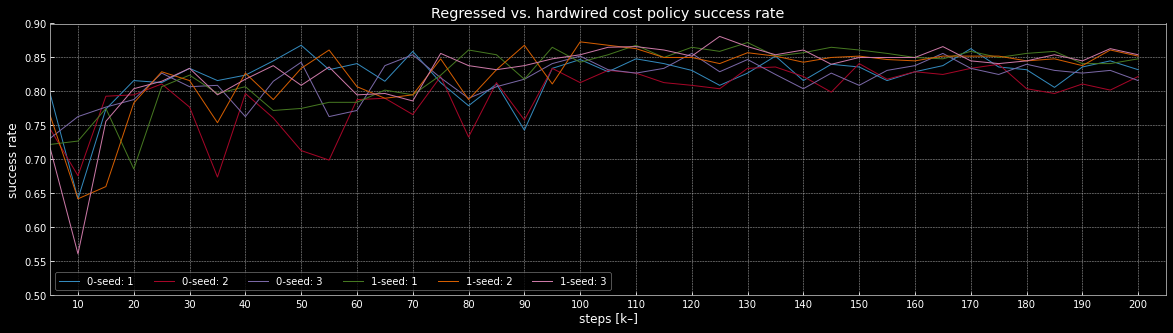

In [34]:
for k in range(len(performance_path)):
    for seed in seeds:
        plt.plot(
            array(steps) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            linewidth=4 if k is h else 1
        )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 205])
plt.title('Regressed vs. hardwired cost policy success rate')
plt.xticks(range(10, 200 + 10, 10));

plt.savefig('Rgr-vs-hrd-success_rate.png', bbox_inches = 'tight')

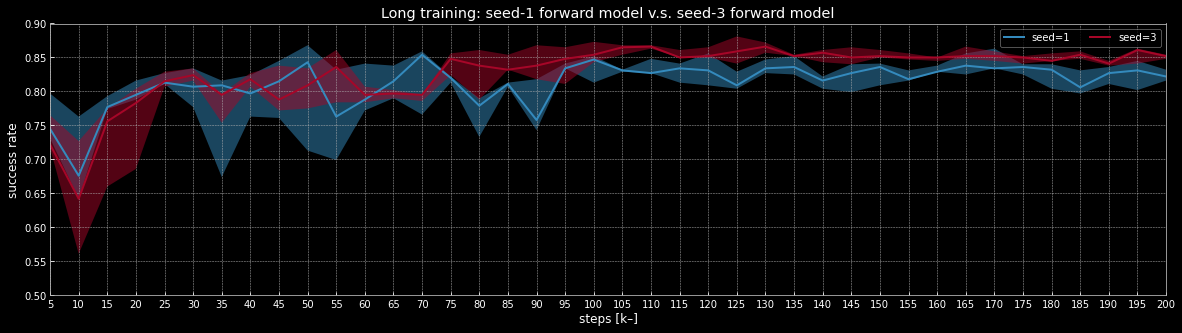

In [35]:
success_arr = {k: array(success[k]) for k in range(len(performance_path))}
# stats = ('min', 'max', 'median')
name_seed = ['seed=1','seed=3']
for k in range(2):
    plt.plot(
        array(steps) / 1e3, numpy.median(success_arr[k], 0),
        label=f'{name_seed[k]}',
        linewidth=2,
    )
for k in range(2):
    plt.fill_between(
        array(steps) / 1e3, success_arr[k].min(0), success_arr[k].max(0),
        alpha=.5,
    )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 200])
plt.title('Long training: seed-1 forward model v.s. seed-3 forward model')
plt.xticks(range(5, 200+5, 5));

plt.savefig('Long_training.png', bbox_inches = 'tight')


In [36]:
N = 19
performance_path = ['c%d' % (i+1) for i in range(9)]
name = ['MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.5-lambdao=0.5-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=False-learnedcost=%s-seed'% s + '={seed}' + \
       '-pad=1-novaluestep{step}.model.log' for s in ["1001","1101","1201","1011","1111","1211","1021","1121","1221"]]
#seeds = [i + 1 for i in range(1)]
seeds = [1,2,3]
success = [list(list() for seed in seeds) for k in performance_path]
steps = [(i + 1) * 5000 for i in range(N)]
for k in range(len(performance_path)):
    mean=0
    count=0
    highest_success=-1
    for seed in seeds:
        for step in steps:
            file_name = path.join(performance_path[k], name[k].format(seed=seed, step=step))
            with open(file_name) as f:
                success_rate=float(f.readlines()[-1].split()[-1])
                success[k][seed - 1].append(success_rate)
                if step>=30000:
                    mean+=float(success_rate)
                    count+=1
                    highest_success=max(highest_success,success_rate)

    #print(str(k)+":mean="+str(mean_success/count)+" high="+str(highest_success))
    mean=mean/count
    sum = 0
    for seed in seeds:
        step=5000
        for success_rate in success[k][seed - 1]:
            if step>=60000:
                sum+=(success_rate-mean)**2
            step+=5000
    sum=sum/count
    std = math.sqrt(sum)
    print(f"{k}:mean={mean:.2f}±{std:.2f}")
    #print(str(k)+":std="+str(std))

0:mean=0.82±0.01
1:mean=0.81±0.02
2:mean=0.83±0.01
3:mean=0.80±0.01
4:mean=0.82±0.01
5:mean=0.82±0.02
6:mean=0.82±0.01
7:mean=0.81±0.02
8:mean=0.79±0.02


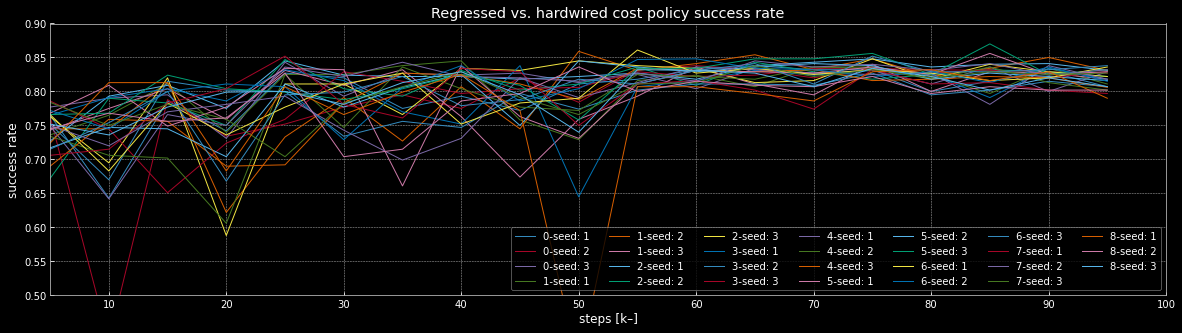

In [37]:
for k in range(len(performance_path)):
    for seed in seeds:
        plt.plot(
            array(steps) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            linewidth=4 if k is h else 1
        )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 100])
plt.title('Regressed vs. hardwired cost policy success rate')
plt.xticks(range(10, 95 + 10, 10));

plt.savefig('Rgr-vs-hrd-success_rate.png', bbox_inches = 'tight')

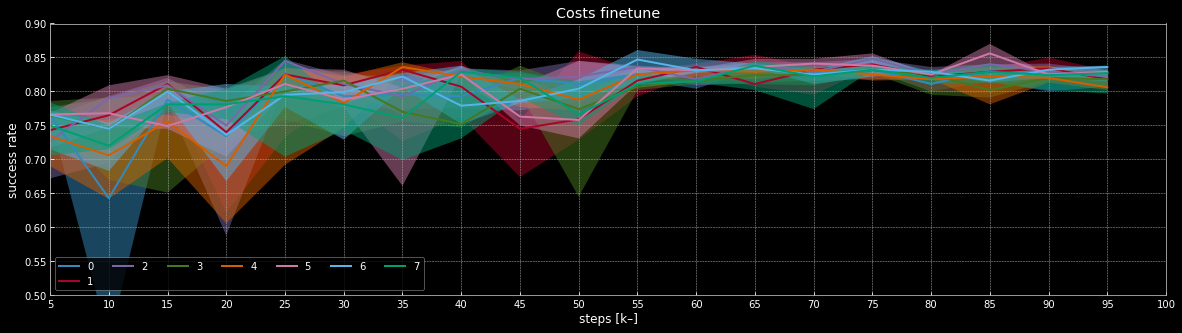

In [38]:
success_arr = {k: array(success[k]) for k in range(len(performance_path))}
# stats = ('min', 'max', 'median')
for k in range(0,8):
    plt.plot(
        array(steps) / 1e3, numpy.median(success_arr[k], 0),
        label=f'{k}',
        linewidth=2,
    )
for k in range(0,8):
    plt.fill_between(
        array(steps) / 1e3, success_arr[k].min(0), success_arr[k].max(0),
        alpha=.5,
    )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.90])
plt.xlim([5, 100])
plt.title('Costs finetune')
plt.xticks(range(5, 100+5, 5));

plt.savefig('Costs finetune.png', bbox_inches = 'tight')
